# CE49X: Introduction to Computational Thinking and Data Science for Civil Engineers
## Week 2: Python Modules and Data Science Tools

**Instructor:** Dr. Eyuphan Koc  
**Department of Civil Engineering, Bogazici University**  
**Semester:** Spring 2026

---

## Our Mission Today

We have a [real dataset](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm) from the UCI Machine Learning Repository: **36,000+ configurations** of a wave energy farm near Perth, Australia. Each row describes how **49 wave energy converters** (WECs) are arranged and how much power they produce.

Our goal: **load, clean, analyze, visualize, and model** this data — learning a new Python module at each step.

| Step | Module | What We Do |
|------|--------|------------|
| 1 | **Modules & Imports** | Learn how to unlock Python's power |
| 2 | **`math`** | Calculate distances between converters |
| 3 | **Strings + `re`** | Parse and understand column names |
| 4 | **`pandas`** | Load the CSV and explore the dataset |
| 5 | **`numpy`** | Fast array operations on positions and power |
| 6 | **`matplotlib`** | Visualize farm layouts and power output |
| 7 | **`scipy`** | Fit a model: does spacing affect power? |

---
## Part 1: Modules — Unlocking Python's Power

Python alone is simple. **Modules** make it powerful.

- A **module** = a `.py` file with reusable functions
- A **package** = a folder of modules
- Python has **100,000+** packages available

### Three Ways to Import

| Method | Example | When to Use |
|--------|---------|-------------|
| Full import | `import math` | General use — always clear |
| Alias | `import numpy as np` | Standard conventions (`np`, `pd`, `plt`) |
| Selective | `from math import sqrt` | When you only need 1-2 functions |

> **Key Insight:** Never use `from module import *` — it can silently overwrite existing functions.

In [1]:
# Three import styles
import math                    # Full import
import numpy as np             # Alias (community convention)
from statistics import mean    # Selective

print(math.sqrt(2))      # Clear: sqrt comes from math
print(np.sqrt(2))        # Short: np is universally understood
print(mean([1, 2, 3]))   # Direct: when you use it often

1.4142135623730951
1.4142135623730951
2


In [2]:
# Another common module: datetime
import datetime

today = datetime.date.today()
print(f"Today's date: {today}")

Today's date: 2026-02-23


---
## Part 2: `math` — Distances Between Converters

Wave energy converters interact with each other through the water. If they're **too close**, they interfere and lose power. We need the `math` module to calculate distances.

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

In [3]:
import math

# Two converter positions (in meters from origin)
x1, y1 = 600.0, 0.0     # WEC 1
x2, y2 = 546.16, 37.5   # WEC 2

# Euclidean distance
distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
print(f"Distance between WEC-1 and WEC-2: {distance:.1f} m")

# Angle between them
angle_rad = math.atan2(y2 - y1, x2 - x1)
angle_deg = math.degrees(angle_rad)
print(f"Angle: {angle_deg:.1f}\u00b0")

Distance between WEC-1 and WEC-2: 65.6 m
Angle: 145.1°


In [5]:
# Compute distances between first 4 converters
positions = [
    (600.0, 0.0),      # WEC 1
    (546.16, 37.5),    # WEC 2
    (489.79, 74.88),   # WEC 3
    (432.47, 112.05),  # WEC 4
]

print("Pairwise distances (m):")
for i in range(len(positions)):
    for j in range(i + 1, len(positions)):
        x1, y1 = positions[i]
        x2, y2 = positions[j]
        d = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        print(f"  WEC-{i+1} \u2194 WEC-{j+1}: {d:.1f} m")

# That's a lot of loops... numpy will make this much easier (Part 5)

Pairwise distances (m):
  WEC-1 ↔ WEC-2: 65.6 m
  WEC-1 ↔ WEC-3: 133.2 m
  WEC-1 ↔ WEC-4: 201.5 m
  WEC-2 ↔ WEC-3: 67.6 m
  WEC-2 ↔ WEC-4: 136.0 m
  WEC-3 ↔ WEC-4: 68.3 m


---
## Part 3: Strings + `re` — Understanding Column Names

Our dataset has **149 columns**: `X1, Y1, X2, Y2, ..., X49, Y49, Power1, ..., Power49, qW, Total_Power`.

Before we can work with this data, we need to **parse** these names to understand the structure.

> **Key Insight:** 80% of real data science is data cleaning and preparation.

In [6]:
# Column names from our dataset
columns = ['X1', 'Y1', 'X2', 'Y2', 'Power1', 'Power2', 'qW', 'Total_Power']

# String methods help us categorize them
for col in columns:
    if col.startswith('X'):
        print(f"  {col} \u2192 x-coordinate")
    elif col.startswith('Y'):
        print(f"  {col} \u2192 y-coordinate")
    elif col.startswith('Power'):
        print(f"  {col} \u2192 individual power")
    else:
        print(f"  {col} \u2192 summary metric")

  X1 → x-coordinate
  Y1 → y-coordinate
  X2 → x-coordinate
  Y2 → y-coordinate
  Power1 → individual power
  Power2 → individual power
  qW → summary metric
  Total_Power → summary metric


In [7]:
import re

# Use regex to extract converter numbers from column names
all_columns = (
    [f'X{i}' for i in range(1, 50)] +
    [f'Y{i}' for i in range(1, 50)] +
    [f'Power{i}' for i in range(1, 50)] +
    ['qW', 'Total_Power']
)

x_cols = [c for c in all_columns if re.match(r'^X\d+$', c)]
y_cols = [c for c in all_columns if re.match(r'^Y\d+$', c)]
power_cols = [c for c in all_columns if re.match(r'^Power\d+$', c)]

print(f"Position columns: {len(x_cols)} X + {len(y_cols)} Y = {len(x_cols) + len(y_cols)}")
print(f"Power columns:    {len(power_cols)}")
print(f"Summary columns:  qW, Total_Power")
print(f"Total:            {len(all_columns)} columns")

Position columns: 49 X + 49 Y = 98
Power columns:    49
Summary columns:  qW, Total_Power
Total:            149 columns


In [8]:
# Regex can extract the numbers directly
sample_cols = ['X12', 'Y35', 'Power7', 'Total_Power']

for col in sample_cols:
    match = re.search(r'(\d+)', col)
    if match:
        num = int(match.group(1))
        print(f"  {col:15s} \u2192 converter #{num}")
    else:
        print(f"  {col:15s} \u2192 farm-level metric")

  X12             → converter #12
  Y35             → converter #35
  Power7          → converter #7
  Total_Power     → farm-level metric


### f-strings: Formatted Output

f-strings (Python 3.6+) let you embed expressions directly in strings.

In [9]:
# Formatting tricks you'll use constantly
power = 103141.37
efficiency = 0.872
n_converters = 49

print(f"Power output:    {power:.1f} W")             # 1 decimal
print(f"Power output:    {power/1000:.1f} kW")       # convert units
print(f"Efficiency:      {efficiency:.1%}")           # auto percentage
print(f"Farm size:       {n_converters} WECs")        # integer
print(f"Status:          {'GOOD' if efficiency > 0.8 else 'CHECK'}")

Power output:    103141.4 W
Power output:    103.1 kW
Efficiency:      87.2%
Farm size:       49 WECs
Status:          GOOD


In [10]:
# Cleaning messy sensor labels with string methods + regex
messy_labels = [
    "  wec_01  ",
    "WEC-2",
    "converter 03",
    "WEC_04",
]

clean_labels = []
for label in messy_labels:
    match = re.search(r'\d+', label.strip())
    if match:
        num = int(match.group(0))
        clean_labels.append(f"WEC-{num:02d}")

print(f"Before: {messy_labels}")
print(f"After:  {clean_labels}")

Before: ['  wec_01  ', 'WEC-2', 'converter 03', 'WEC_04']
After:  ['WEC-01', 'WEC-02', 'WEC-03', 'WEC-04']


---
## Part 4: `pandas` — Loading and Exploring the Dataset

Pandas reads CSV files into **DataFrames** — labeled tables with powerful built-in analysis.

In [12]:
import pandas as pd

# Load the wave energy farm dataset
df = pd.read_csv('WEC_Perth_49.csv')

print(f"Dataset: {df.shape[0]:,} rows \u00d7 {df.shape[1]} columns")
print(f"Each row = one farm layout configuration")
print(f"Each configuration places 49 wave energy converters")
df.head(3)

Dataset: 36,043 rows × 149 columns
Each row = one farm layout configuration
Each configuration places 49 wave energy converters


,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.5,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.5,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.5,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44


In [13]:
# Quick summary of key columns
key_cols = ['X1', 'Y1', 'Power1', 'Total_Power', 'qW']
print(df[key_cols].describe().round(1))

print(f"\nTotal power range: {df['Total_Power'].min()/1e6:.2f} \u2013 {df['Total_Power'].max()/1e6:.2f} MW")
print(f"Quality factor range: {df['qW'].min():.2f} \u2013 {df['qW'].max():.2f}")

            X1       Y1    Power1  Total_Power       qW
count  36043.0  36043.0   36043.0      36043.0  36043.0
mean     366.6     18.7   60643.8    3938246.5      0.8
std      307.9     44.0   11627.7     122617.1      0.0
min        0.0      0.0   36990.8    3388944.2      0.7
25%       65.8      0.0   53329.9    3847334.5      0.8
50%      250.0      0.0   57156.6    3931540.6      0.8
75%      600.0      0.0   65302.4    4063622.7      0.9
max     1000.0    885.6  103141.4    4177659.0      0.9

Total power range: 3.39 – 4.18 MW
Quality factor range: 0.72 – 0.88


In [14]:
# Filter: find the best and worst configurations
best_config = df.loc[df['Total_Power'].idxmax()]
worst_config = df.loc[df['Total_Power'].idxmin()]

print(f"Best layout:  Total Power = {best_config['Total_Power']/1e6:.2f} MW  (qW = {best_config['qW']:.2f})")
print(f"Worst layout: Total Power = {worst_config['Total_Power']/1e6:.2f} MW  (qW = {worst_config['qW']:.2f})")
print(f"Difference:   {(best_config['Total_Power'] - worst_config['Total_Power'])/1e6:.2f} MW ({((best_config['Total_Power']/worst_config['Total_Power'])-1)*100:.0f}% more)")

Best layout:  Total Power = 4.18 MW  (qW = 0.88)
Worst layout: Total Power = 3.39 MW  (qW = 0.72)
Difference:   0.79 MW (23% more)


In [15]:
# Group by quality factor ranges
df['qW_bin'] = pd.cut(df['qW'], bins=[0.70, 0.75, 0.80, 0.85, 0.90],
                      labels=['0.70-0.75', '0.75-0.80', '0.80-0.85', '0.85-0.90'])

summary = df.groupby('qW_bin', observed=True)['Total_Power'].agg(['count', 'mean', 'std']).round(0)
summary['mean_MW'] = (summary['mean'] / 1e6).round(2)
print("Total Power by Quality Factor:")
print(summary[['count', 'mean_MW']])

Total Power by Quality Factor:
           count  mean_MW
qW_bin                   
0.70-0.75     57     3.52
0.75-0.80   5279     3.75
0.80-0.85  19555     3.91
0.85-0.90  11152     4.08


In [16]:
# Find high-performing layouts
high_quality = df[df['qW'] >= 0.86]
print(f"Layouts with qW >= 0.86: {len(high_quality):,}")
print(f"Average total power:     {high_quality['Total_Power'].mean()/1e6:.2f} MW")
print(f"That's the top {len(high_quality)/len(df)*100:.1f}% of all configurations")

Layouts with qW >= 0.86: 11,152
Average total power:     4.08 MW
That's the top 30.9% of all configurations


---
## Part 5: `numpy` — Fast Array Operations

Pandas is great for tabular data. But when we need **fast math on arrays**, NumPy is 10-100x faster than Python lists.

Let's extract positions and powers as NumPy arrays and compute things efficiently.

In [17]:
import numpy as np

# Extract position and power arrays for the best layout
best = df.loc[df['Total_Power'].idxmax()]

x_cols = [f'X{i}' for i in range(1, 50)]
y_cols = [f'Y{i}' for i in range(1, 50)]
power_cols = [f'Power{i}' for i in range(1, 50)]

x_pos = best[x_cols].values.astype(float)    # shape: (49,)
y_pos = best[y_cols].values.astype(float)
powers = best[power_cols].values.astype(float)

print(f"49 converters loaded as NumPy arrays")
print(f"X range: {x_pos.min():.0f} \u2013 {x_pos.max():.0f} m")
print(f"Y range: {y_pos.min():.0f} \u2013 {y_pos.max():.0f} m")
print(f"Power range: {powers.min()/1000:.1f} \u2013 {powers.max()/1000:.1f} kW")

49 converters loaded as NumPy arrays
X range: 0 – 1000 m
Y range: 0 – 1000 m
Power range: 58.1 – 110.6 kW


In [18]:
# Vectorized statistics — no loops!
print(f"Mean power per WEC:   {np.mean(powers)/1000:.1f} kW")
print(f"Std dev:              {np.std(powers)/1000:.1f} kW")
print(f"Total farm power:     {np.sum(powers)/1e6:.2f} MW")
print(f"Best converter:       WEC-{np.argmax(powers)+1} ({np.max(powers)/1000:.1f} kW)")
print(f"Worst converter:      WEC-{np.argmin(powers)+1} ({np.min(powers)/1000:.1f} kW)")

Mean power per WEC:   85.3 kW
Std dev:              15.6 kW
Total farm power:     4.18 MW
Best converter:       WEC-42 (110.6 kW)
Worst converter:      WEC-24 (58.1 kW)


In [19]:
# Remember the painful loop from Part 2? NumPy does it in one shot.
# Compute ALL pairwise distances between 49 converters

# Broadcasting: dx[i,j] = x[j] - x[i]
dx = x_pos[np.newaxis, :] - x_pos[:, np.newaxis]   # (49, 49)
dy = y_pos[np.newaxis, :] - y_pos[:, np.newaxis]
dist_matrix = np.sqrt(dx**2 + dy**2)

# Set diagonal to inf (distance to self = 0, not useful)
np.fill_diagonal(dist_matrix, np.inf)

# Find minimum spacing for each converter
min_spacings = np.min(dist_matrix, axis=1)

print(f"Distance matrix shape: {dist_matrix.shape}")
print(f"Closest neighbor distances:")
print(f"  Min:  {np.min(min_spacings):.1f} m")
print(f"  Mean: {np.mean(min_spacings):.1f} m")
print(f"  Max:  {np.max(min_spacings):.1f} m")

Distance matrix shape: (49, 49)
Closest neighbor distances:
  Min:  51.5 m
  Mean: 66.3 m
  Max:  93.4 m


In [20]:
# Deeper analysis of power distribution
above_avg = np.sum(powers > np.mean(powers))
print(f"Converters above average power: {above_avg} / 49 ({above_avg/49:.0%})")

# Top 5 converters
top5_idx = np.argsort(powers)[-5:][::-1]  # indices of top 5
top5_power = powers[top5_idx]
print(f"\nTop 5 converters:")
for rank, (idx, p) in enumerate(zip(top5_idx, top5_power), 1):
    print(f"  #{rank}: WEC-{idx+1} \u2192 {p/1000:.1f} kW")

print(f"\nTop 5 combined: {np.sum(top5_power)/1000:.1f} kW ({np.sum(top5_power)/np.sum(powers)*100:.1f}% of total)")

Converters above average power: 23 / 49 (47%)

Top 5 converters:
  #1: WEC-42 → 110.6 kW
  #2: WEC-43 → 108.6 kW
  #3: WEC-44 → 106.0 kW
  #4: WEC-38 → 103.8 kW
  #5: WEC-39 → 103.4 kW

Top 5 combined: 532.3 kW (12.7% of total)


---
## Part 6: `matplotlib` — Visualizing the Farm

Numbers tell a story. **Plots make it obvious.**

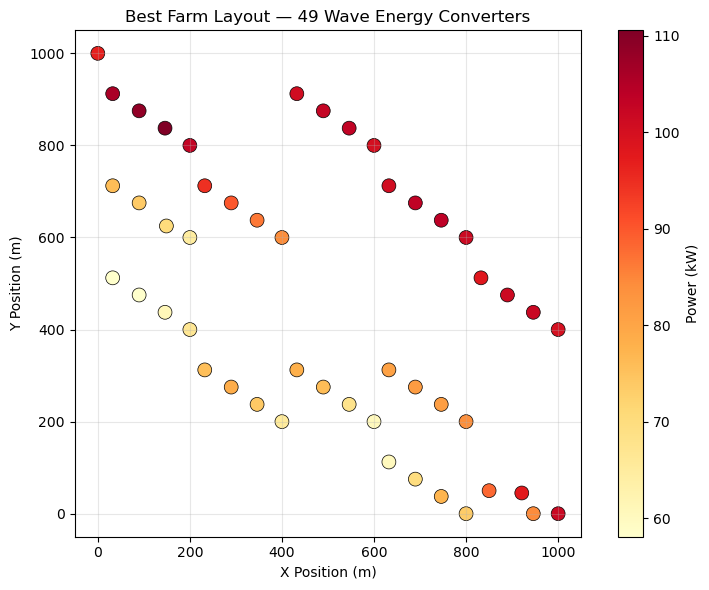

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scatter plot: farm layout colored by power output
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(x_pos, y_pos, c=powers/1000, cmap='YlOrRd',
                     s=100, edgecolors='black', linewidths=0.5)

cbar = plt.colorbar(scatter, ax=ax, label='Power (kW)')
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('Best Farm Layout \u2014 49 Wave Energy Converters')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

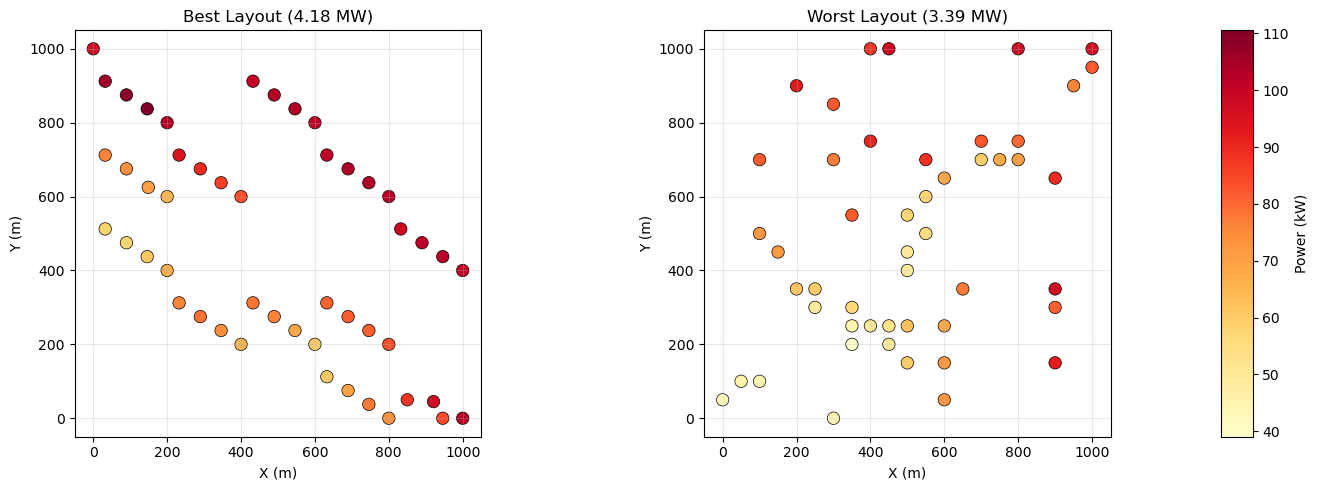

In [22]:
# Compare best vs worst layout side by side
worst = df.loc[df['Total_Power'].idxmin()]
x_worst = worst[x_cols].values.astype(float)
y_worst = worst[y_cols].values.astype(float)
p_worst = worst[power_cols].values.astype(float)

fig, (ax1, ax2, cax) = plt.subplots(1, 3, figsize=(14, 5),
                                     gridspec_kw={'width_ratios': [1, 1, 0.05]})

# Shared color scale
vmin = min(powers.min(), p_worst.min()) / 1000
vmax = max(powers.max(), p_worst.max()) / 1000

sc1 = ax1.scatter(x_pos, y_pos, c=powers/1000, cmap='YlOrRd',
                  s=80, edgecolors='black', linewidths=0.5, vmin=vmin, vmax=vmax)
ax1.set_title(f'Best Layout ({best["Total_Power"]/1e6:.2f} MW)')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

sc2 = ax2.scatter(x_worst, y_worst, c=p_worst/1000, cmap='YlOrRd',
                  s=80, edgecolors='black', linewidths=0.5, vmin=vmin, vmax=vmax)
ax2.set_title(f'Worst Layout ({worst["Total_Power"]/1e6:.2f} MW)')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

fig.colorbar(sc2, cax=cax, label='Power (kW)')
plt.tight_layout()
plt.show()

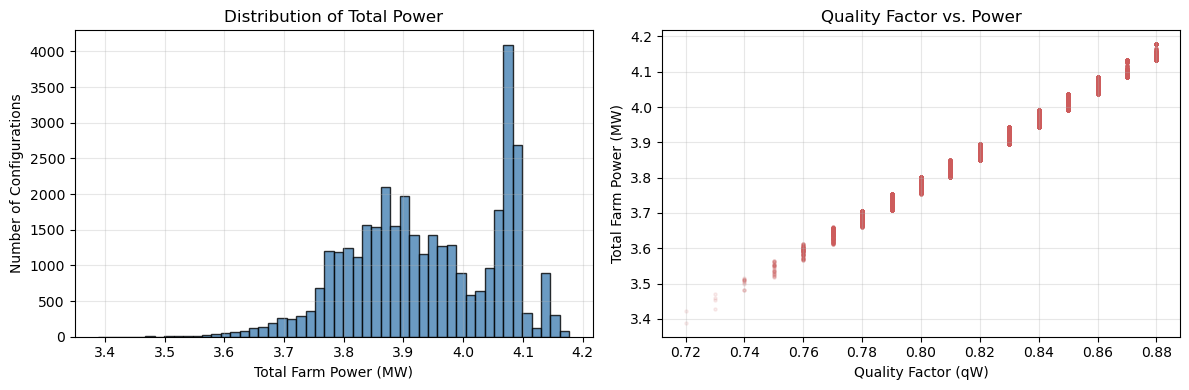

In [23]:
# Distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Total power distribution across all configurations
ax1.hist(df['Total_Power'] / 1e6, bins=50, color='steelblue',
         edgecolor='black', alpha=0.8)
ax1.set_xlabel('Total Farm Power (MW)')
ax1.set_ylabel('Number of Configurations')
ax1.set_title('Distribution of Total Power')
ax1.grid(True, alpha=0.3)

# Quality factor vs total power
ax2.scatter(df['qW'], df['Total_Power'] / 1e6, alpha=0.1, s=5, color='indianred')
ax2.set_xlabel('Quality Factor (qW)')
ax2.set_ylabel('Total Farm Power (MW)')
ax2.set_title('Quality Factor vs. Power')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Part 7: `scipy` — Modeling Spacing vs. Power

**Question:** Does the average spacing between converters predict total power?

Let's compute spacing for a sample of configurations and fit a model.

In [24]:
from scipy.optimize import curve_fit

# Sample 500 configurations for speed
sample = df.sample(500, random_state=42)

# Compute mean nearest-neighbor distance for each configuration
mean_spacings = []
total_powers = []

for _, row in sample.iterrows():
    xs = row[x_cols].values.astype(float)
    ys = row[y_cols].values.astype(float)
    
    # Pairwise distance matrix
    dx = xs[np.newaxis, :] - xs[:, np.newaxis]
    dy = ys[np.newaxis, :] - ys[:, np.newaxis]
    dists = np.sqrt(dx**2 + dy**2)
    np.fill_diagonal(dists, np.inf)
    
    mean_spacings.append(np.mean(np.min(dists, axis=1)))
    total_powers.append(row['Total_Power'])

mean_spacings = np.array(mean_spacings)
total_powers = np.array(total_powers)

print(f"Computed spacing for {len(mean_spacings)} configurations")
print(f"Spacing range: {mean_spacings.min():.0f} \u2013 {mean_spacings.max():.0f} m")

Computed spacing for 500 configurations
Spacing range: 62 – 118 m


In [25]:
# Fit a linear model: Total_Power = a * spacing + b
def linear_model(x, a, b):
    return a * x + b

params, _ = curve_fit(linear_model, mean_spacings, total_powers)
a, b = params

print(f"Model: Power = {a:.0f} \u00d7 spacing + {b/1e6:.2f}M")
print(f"Each extra meter of spacing \u2192 {a/1000:.1f} kW")

Model: Power = -5727 × spacing + 4.40M
Each extra meter of spacing → -5.7 kW


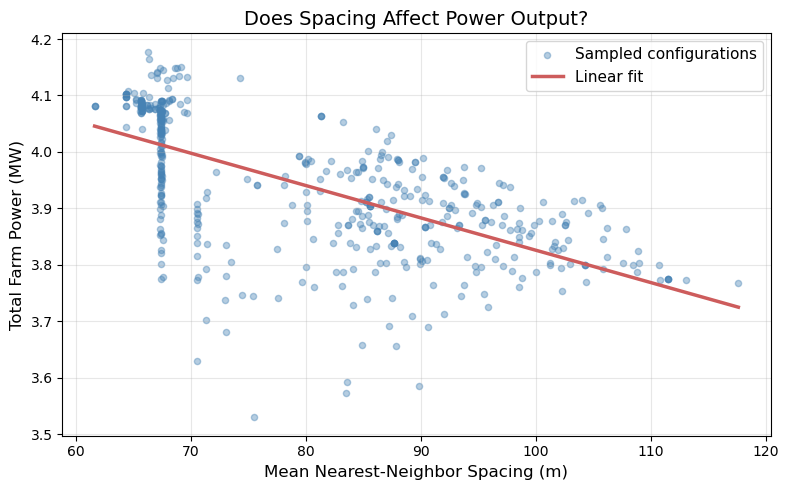

In [26]:
# Plot the fit
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(mean_spacings, total_powers / 1e6, alpha=0.4, s=20, color='steelblue',
           label='Sampled configurations')

x_fit = np.linspace(mean_spacings.min(), mean_spacings.max(), 100)
y_fit = linear_model(x_fit, a, b) / 1e6
ax.plot(x_fit, y_fit, 'indianred', linewidth=2.5, label='Linear fit')

ax.set_xlabel('Mean Nearest-Neighbor Spacing (m)', fontsize=12)
ax.set_ylabel('Total Farm Power (MW)', fontsize=12)
ax.set_title('Does Spacing Affect Power Output?', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Recap: One Dataset, Seven Tools

We went from a **raw CSV** to a **predictive model** step by step:

| Step | Module | What We Did |
|------|--------|-------------|
| 1 | `import` | Learned 3 ways to bring in tools |
| 2 | `math` | Computed distances between converters |
| 3 | `str` + `re` | Parsed column names and extracted patterns |
| 4 | `pandas` | Loaded CSV, filtered, grouped, summarized |
| 5 | `numpy` | Vectorized stats, distance matrices |
| 6 | `matplotlib` | Plotted layouts, distributions, comparisons |
| 7 | `scipy` | Fit a spacing-vs-power model |

> **Key Insight:** Each library has a clear role. Together they form a complete data science pipeline.

### Quick Reference

```python
import math                      # Trig, constants, basic math
import re                        # Pattern matching in text
import numpy as np               # Arrays, linear algebra, stats
import pandas as pd              # DataFrames, groupby, CSV I/O
import matplotlib.pyplot as plt  # Plotting and visualization
from scipy.optimize import curve_fit  # Curve fitting
```

**String cleaning:** `.strip()` \u2192 `.lower()` \u2192 `.split()` \u2192 `.replace()`  
**Regex basics:** `\d+` (digits), `\d+\.?\d*` (decimals), `^X\d+$` (exact match)

---

### Questions?

**Dr. Eyuphan Koc**  
eyuphan.koc@bogazici.edu.tr